In [2]:
#np.sum(np.arange(1_000_000)), pd.__version__, sns.__version__


In [3]:
#x = np.linspace(0, 10, 200)
#y = np.sin(x)
#plt.plot(x, y)
#plt.title("OK plot"); plt.show()


In [4]:
#plt.rcParams.update({"figure.figsize": (8,5), "axes.facecolor":"white", "axes.edgecolor":"black"})


In [5]:
import warnings

warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [9]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
sales_sqlalchemy = pd.read_sql(query_string, db)

In [10]:
sales_sqlalchemy.head()

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [11]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
details_sqlalchemy = pd.read_sql(query_string, db)

In [12]:
details_sqlalchemy.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
5,100300280,3.000,2.250,1430.000,4777.000,2.000,0.000,0.000,3,7,1430.000,0.000,2010,0.000,98059,47.487,-122.152,1639.000,3854.000
6,100300500,3.000,2.500,1520.000,3041.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,NaN,98059,47.487,-122.152,1820.000,3229.000
7,100300530,3.000,2.500,1520.000,3003.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,0.000,98059,47.488,-122.153,1820.000,3030.000
8,1003400155,3.000,1.000,1100.000,7657.000,1.000,0.000,0.000,3,7,1100.000,0.000,1955,0.000,98188,47.437,-122.285,1300.000,8000.000
9,1003400245,3.000,1.000,1130.000,9907.000,1.000,0.000,0.000,3,7,1130.000,0.000,1954,0.000,98188,47.436,-122.286,1320.000,9907.000


In [13]:
from sqlalchemy import text

# Your SQL query
query = text("""
SELECT
    kchd.*,
    kchs.date,
    kchs.price
FROM eda.king_county_house_details AS kchd
LEFT JOIN eda.king_county_house_sales AS kchs
    ON kchd.id = kchs.house_id
""")

# Execute and read into a Pandas DataFrame
df = pd.read_sql_query(query, db, parse_dates=["date"])

# Inspect the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [14]:
df.shape

(21597, 21)

In [15]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [16]:
df['date'].nsmallest()

172    2014-05-02
312    2014-05-02
502    2014-05-02
775    2014-05-02
1040   2014-05-02
Name: date, dtype: datetime64[ns]

In [17]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


In [18]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [19]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [20]:
import missingno as msno
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

Finding the ZIP codes for city center and countryside. First figure out how many and what kinds of different ZIP codes there are. (Answer: 70 zip codes + see below.) Google for the zip codes that are concidered Seattle center or the country side. Country zips correspond to nicer rural areas suitable for a vacation home.

In [21]:
df['zipcode'].nunique()
#df['zipcode'].value_counts()

70

In [22]:
central_zips = [98101, 98102, 98104, 98109, 98119, 98122, 98144, 98105]
#urban_zips_extended = central_zips + [
#    98103, 98107, 98115, 98116, 98117, 98118, 98125, 98126, 98133, 98136, 98146,
#    98004, 98005, 98006, 98007, 98008, 98033, 98034, 98039, 98040, 98052
#]
country_zips = [98010, 98014, 98024, 98045, 98051, 98065, 98068, 98072, 98077]

#df['area_type'] = df['zipcode'].apply(lambda x: 'country' if x in country_zips else 'city')

Central houses.
Since the client wants a house for two people, we only need houses with two bedrooms. This reduces the number of options to 274.

In [23]:
df_2bed_central = df[(df['bedrooms'] == 2) & (df['zipcode']).isin(central_zips)]
df_2bed_central.shape

(274, 21)

In [24]:
import plotly.express as px
df_2bed_central_map = (df_2bed_central.rename(columns={"latitude":"lat","longitude":"lon"})
                       .assign(zip_str=lambda d: d["zipcode"].astype(str)))

zip_order = sorted(df_2bed_central_map["zip_str"].unique())

palette = px.colors.qualitative.Set2

fig_map_center = px.scatter_map(
    df_2bed_central_map,
    lat="lat", 
    lon="long",
    color="zip_str",
    category_orders={"zip_str": zip_order},
    color_discrete_sequence=palette,
    hover_data=["price","zipcode"],
    zoom=9, 
    height=600,
    title="Houses by ZIP"
)
fig_map_center.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0), legend_title_text="ZIP code")

fig_map_center

Now let's figure out the pricing.

In [25]:
df_2bed_central['price'].nunique()
df_2bed_central['price'].nsmallest(5)
df_2bed_central['price'].nlargest(10)

18061   1700000.000
19896   1260000.000
7421    1250000.000
218     1070000.000
20234   1050000.000
13015    998500.000
21301    935000.000
15148    930000.000
7189     900000.000
19464    885000.000
Name: price, dtype: float64

In [26]:
av_price_by_zip = df_2bed_central.groupby('zipcode')['price'].mean().reset_index().sort_values(by='zipcode')
av_price_by_zip.head(8)

,zipcode,price
0,98102,534684.783
1,98105,544411.561
2,98109,673645.000
3,98119,615175.000
4,98122,486638.062
5,98144,407804.262


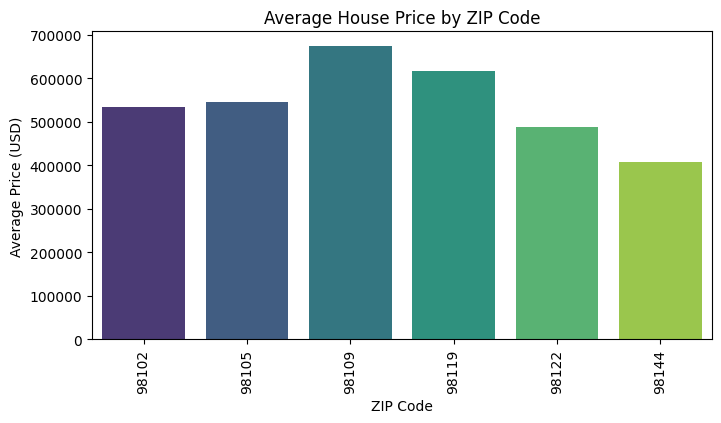

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(data=av_price_by_zip, x="zipcode", y="price", palette="viridis")
plt.title("Average House Price by ZIP Code")
plt.xlabel("ZIP Code")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Apparently, some of the zip areas are more affluent than the others. What about the total distribution of prices?

In [28]:
df_2bed_central['price'].describe()

count       274.000
mean     508031.865
std      182264.717
min      181000.000
25%      387000.000
50%      460000.000
75%      595000.000
max     1700000.000
Name: price, dtype: float64

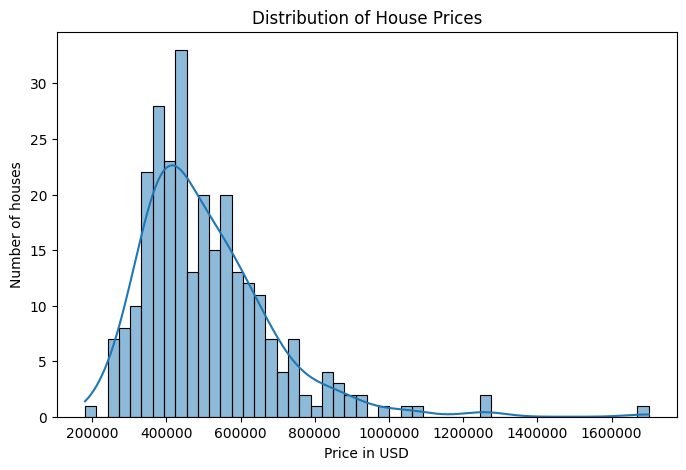

In [29]:
sns.histplot(df_2bed_central['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price in USD")
plt.ylabel("Number of houses")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Because the distribution is skewed, it would be reasonable to focus on the bulk of the houses, prices for which lay between approximately 250000 and 800000 USD. Let's separate them into price categories and see what each of them has to offer. The categories are based on the largest and smallest prices (the extremes were removed) and the quartiles from the descriptive statistics above. 

In [30]:
bins = [245000, 390000, 460000, 595000, 800000]
labels = ['up to 390000', 'up to 460000', 'up to 595000', 'up to 800000']
df_2bed_central["price_category"] = pd.cut(df_2bed_central["price"], bins=bins, labels=labels, include_lowest=True)
df_2bed_central["price_category"].value_counts().sort_index()

price_category
up to 390000    74
up to 460000    63
up to 595000    69
up to 800000    50
Name: count, dtype: int64

In [125]:
df_2bed_central.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'price_category',
       'decade'],
      dtype='object')

In [ ]:
df_2bed_central.groupby("price_category")[["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", 
                                           "bathrooms", "floors", "condition", "grade"]].mean().round(1)

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,bathrooms,floors,condition,grade
price_category,,,,,,,,
up to 390000,991.900,2070.100,1320.500,2646.600,1.400,1.700,3.100,7.000
up to 460000,1119.900,2509.700,1469.800,2982.500,1.600,1.700,3.400,7.200
up to 595000,1291.200,2897.300,1552.900,3109.800,1.600,1.500,3.300,7.200
up to 800000,1459.400,3407.800,1745.500,3598.200,1.600,1.600,3.500,7.800


In [127]:
df_2bed_central.groupby("price_category")[["sqft_living", "sqft_lot", "sqft_living15", "sqft_lot15", 
                                           "bathrooms", "floors", "condition", "grade"]].median()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,bathrooms,floors,condition,grade
price_category,,,,,,,,
up to 390000,980.000,1604.500,1290.000,2118.000,1.500,2.000,3.000,7.000
up to 460000,1090.000,1709.000,1390.000,3000.000,1.500,2.000,3.000,7.000
up to 595000,1200.000,3060.000,1580.000,3600.000,1.500,1.500,3.000,7.000
up to 800000,1450.000,3550.000,1680.000,3620.000,1.625,1.500,3.000,8.000


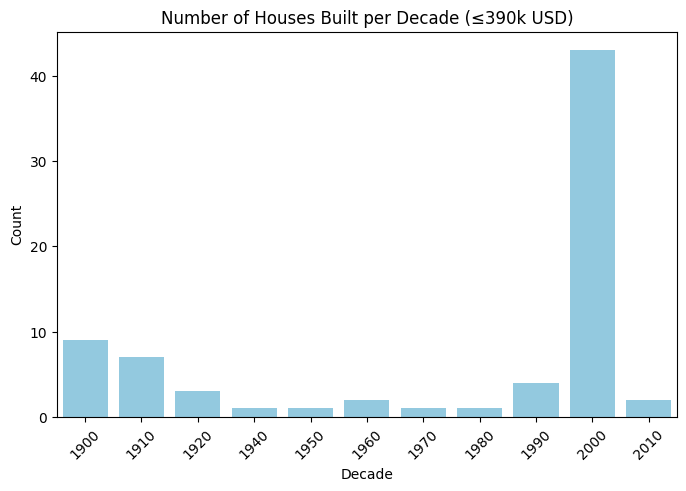

In [32]:
df_2bed_central["decade"] = (df_2bed_central["yr_built"] // 10) * 10

sns.countplot(
    data=df_2bed_central[df_2bed_central["price_category"] == "up to 390000"],
    x="decade",
    color="skyblue"
)
plt.title("Number of Houses Built per Decade (≤390k USD)")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

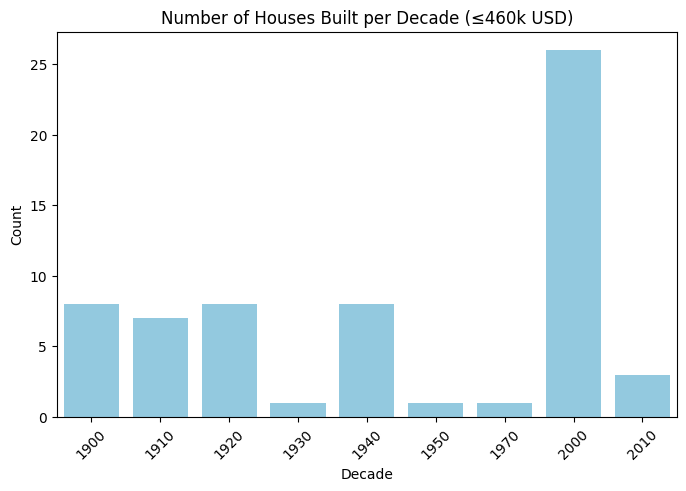

In [33]:
sns.countplot(
    data=df_2bed_central[df_2bed_central["price_category"] == "up to 460000"],
    x="decade",
    color="skyblue"
)
plt.title("Number of Houses Built per Decade (≤460k USD)")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [34]:
df_2bed_central.groupby('price_category')['decade'].agg(pd.Series.mode)

price_category
up to 390000    2000
up to 460000    2000
up to 595000    2000
up to 800000    1920
Name: decade, dtype: int64

Country houses.

First, we look at all the countryhouses in the suitable zip area. After the first glance at the map, I noticed several outliers where either the ZIP code or the latitude/longitude were wrong. No I will throw them away.

In [149]:
df_all_country = df[df['zipcode'].isin(country_zips)]
df_all_country.shape

(1303, 21)

In [150]:
df_all_country = df_all_country[df_all_country["long"] < -121.417]
df_all_country.shape

(1288, 21)

In [151]:
#df_2bed_country_map = (df_2bed_country.rename(columns={"latitude":"lat","longitude":"lon"})
#                       .assign(zip_str=lambda d: d["zipcode"].astype(str)))

df_all_country_map = (df_all_country.assign(zip_str=lambda d: d["zipcode"].astype(str)))

zip_order = sorted(df_all_country_map["zip_str"].unique())

palette = px.colors.qualitative.Set2

fig_map_center = px.scatter_map(
    df_all_country_map,
    lat="lat", 
    lon="long",
    color="zip_str",
    category_orders={"zip_str": zip_order},
    color_discrete_sequence=palette,
    hover_data=["price","zipcode", "id"],
    zoom=8, 
    height=600,
    title="Country houses by ZIP"
)
fig_map_center.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0), legend_title_text="ZIP code")

fig_map_center

Since the best timing was in the client's request, we ask: Is there a better season to look for a house? In particular, are the prices lower in some season? Let's see how active sales were in each month.

In [152]:
df_all_country_count = df_all_country.groupby('date')['date'].count().reset_index(name="count")
df_all_country_count

,date,count
0,2014-05-02,9
1,2014-05-03,1
2,2014-05-05,1
3,2014-05-06,3
4,2014-05-07,6
...,...,...
276,2015-05-07,1
277,2015-05-08,1
278,2015-05-10,1
279,2015-05-11,2


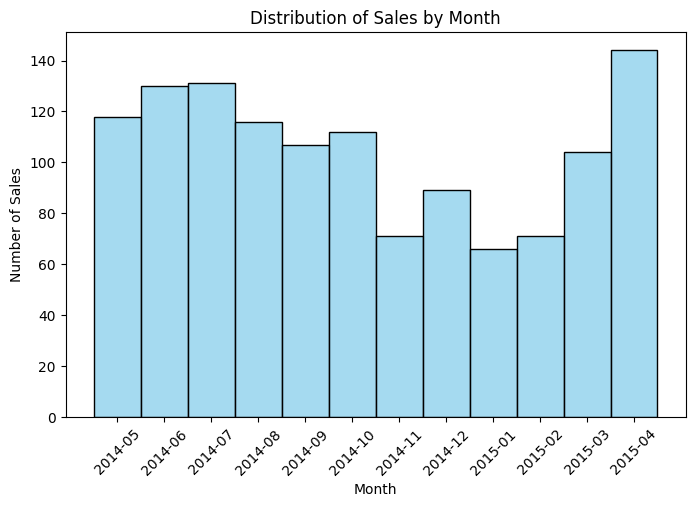

In [156]:
df_all_country_count["month"] = df_all_country_count["date"].dt.to_period("M").astype(str)

#excluding the 2015-05 because the data are incomplete for this month, hence not representative
df_all_country_count = df_all_country_count[df_all_country_count['month'] != '2015-05']

sns.histplot(
    data=df_all_country_count,
    x="month",
    weights="count",   # use counts as weights
    bins=len(df_all_country_count["month"].unique()),
    color="skyblue"
)
plt.xticks(rotation=45)
plt.title("Distribution of Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.show()

In the above diagram I threw away 2015-05 because the data is available only until 2015-05-11:

In [158]:
#df_all_country['date'].nsmallest()
df_all_country['date'].nlargest()

6714    2015-05-12
8675    2015-05-12
8986    2015-05-12
18028   2015-05-12
2539    2015-05-11
Name: date, dtype: datetime64[ns]

In [159]:
df_all_country['month'] = df_all_country['date'].dt.to_period('M').astype('str')
med_price_by_month = df_all_country.groupby('month')['price'].median().reset_index(name = 'med_price')
med_price_by_month = med_price_by_month[med_price_by_month['month'] != '2015-05'] #drop for consistency
med_price_by_month


,month,med_price
0,2014-05,482750.000
1,2014-06,532306.000
2,2014-07,480000.000
3,2014-08,472500.000
4,2014-09,485000.000
5,2014-10,468500.000
6,2014-11,439000.000
7,2014-12,475000.000
8,2015-01,489750.000
9,2015-02,464000.000


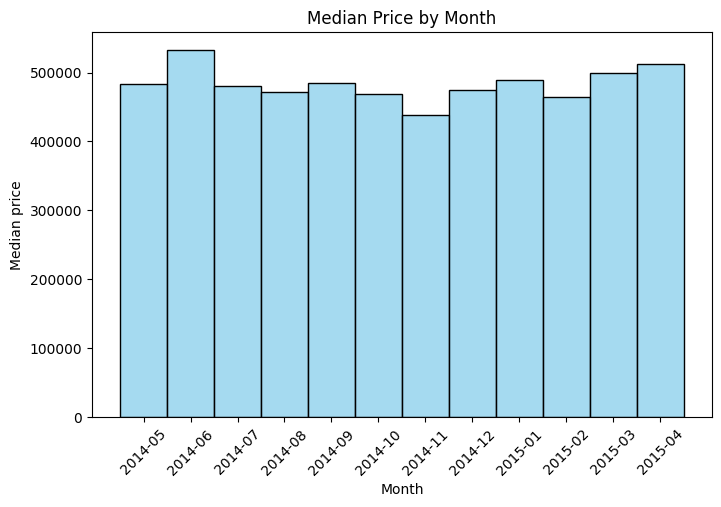

In [160]:
sns.histplot(
    data=med_price_by_month,
    x="month",
    weights="med_price",
    bins=len(med_price_by_month["month"].unique()),
    color="skyblue"
)
plt.xticks(rotation=45)
plt.title("Median Price by Month")
plt.xlabel("Month")
plt.ylabel("Median price")
plt.show()

Looking at these two diagrams, there is a dip in sales in the winter months, but it is not much reflected by the price. So apparently, timing is not a factor for a price. I'd suggest april to october, because there are more houses for sale.
Just out of interest, let's look at the price distribution for the country houses:

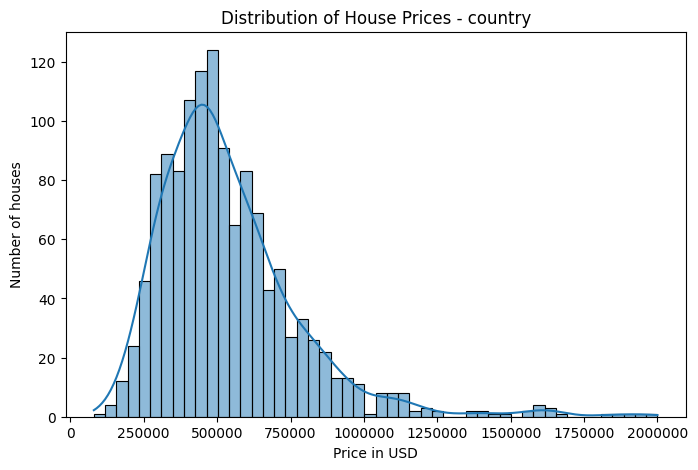

In [161]:
sns.histplot(df_all_country['price'], bins=50, kde=True)
plt.title("Distribution of House Prices - country")
plt.xlabel("Price in USD")
plt.ylabel("Number of houses")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Now to the topic of renovated vs. non-renovated houses. Are the latter cheaper?

In [162]:
df_all_country.shape

(1288, 22)

First, drop all the NaNs and bring the yr_renovated to a normal 4-digit format.

In [163]:
df_all_country['yr_renovated'].isna().sum()

np.int64(210)

In [164]:
df_all_country_nonan = df_all_country.dropna(subset=['yr_renovated'])

In [165]:
df_all_country_nonan['yr_renovated'] = df_all_country_nonan['yr_renovated']/10
df_all_country_nonan['yr_renovated'] = df_all_country_nonan['yr_renovated'].astype('int64')

In [166]:
np.sort(df_all_country_nonan['yr_renovated'].unique())

array([   0, 1951, 1956, 1960, 1965, 1972, 1973, 1977, 1978, 1980, 1983,
       1984, 1985, 1986, 1987, 1989, 1990, 1995, 1996, 1998, 2000, 2001,
       2002, 2004, 2007])

In [167]:
df_all_country_nonan.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'month'],
      dtype='object')

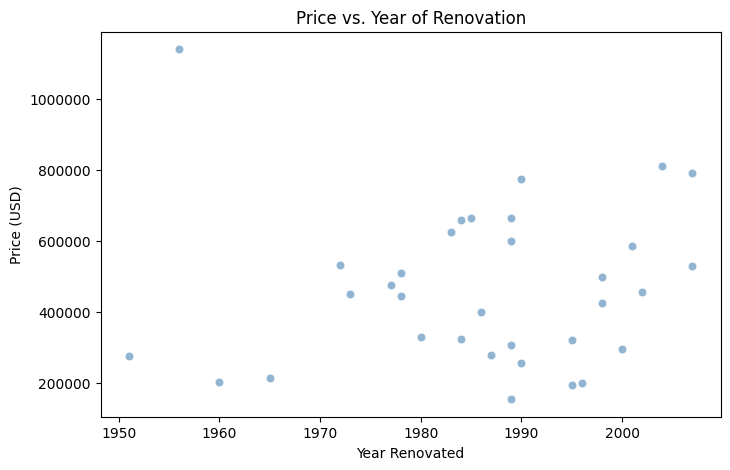

In [168]:
sns.scatterplot(
    data=df_all_country_nonan[df_all_country_nonan['yr_renovated'] != 0],
    #data=df_all_country_nonan[(df_all_country_nonan['yr_renovated'] != 0) & (df_all_country_nonan['bedrooms'] == 2)],
    x="yr_renovated",
    y="price",
    color="steelblue",
    alpha=0.6
)

plt.title("Price vs. Year of Renovation")
plt.xlabel("Year Renovated")
plt.ylabel("Price (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()


The year of renovation itself is not very informative of the expected price. Obviously, there are many factors that determine the price. Let's keep at least one of them standardized and focus exclusively on the 2-bedroom houses.

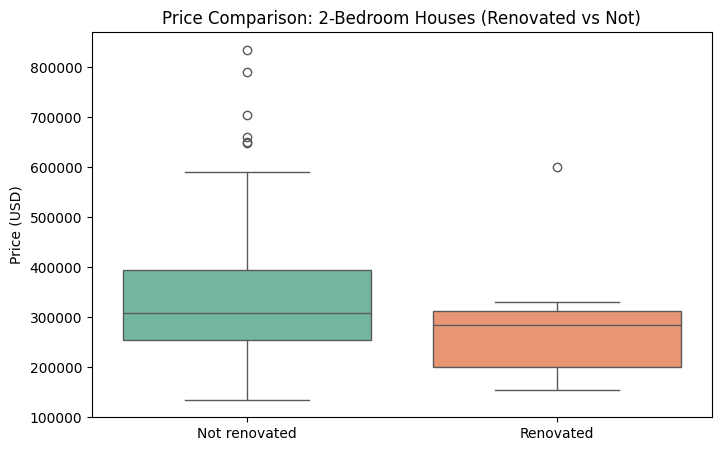

In [169]:
sns.boxplot(
    data=df_all_country_nonan[(df_all_country_nonan["bedrooms"] == 2) 
                              & (df_all_country_nonan["price"] < 900000)], #remove an outlier
    x=(df_all_country_nonan["yr_renovated"] > 0).map({True: "Renovated", False: "Not renovated"}),
    y="price",
    palette="Set2"
)
plt.title("Price Comparison: 2-Bedroom Houses (Renovated vs Not)")
plt.xlabel("")
plt.ylabel("Price (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

It turns out that renovated houses actually cost less than non-renovated. This is worth digging deeper. We need a smaller data frame with only 2-bedroom country houses without NaNs in the column 'yr_renovated'. This limits our search to 70 houses now instead of 1078.

In [170]:
df_all_country_nonan.shape

(1078, 22)

In [172]:
df_2bed_country = df_all_country_nonan[df_all_country_nonan['bedrooms'] == 2]
df_2bed_country.shape

(70, 22)

Now we add a new column "renovated", where the contents are only "Yes" or "No". This will help to compare renovated vs non-renovated houses.

In [173]:
df_2bed_country["renovated"] = df_2bed_country["yr_renovated"] != 0
df_2bed_country["renovated"] = df_2bed_country["renovated"].map({True: "Yes", False: "No"})
df_2bed_country.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,month,renovated
233,943100260,2.000,1.000,1000.000,10200.000,1.000,0.000,0.000,3,6,...,0,98024,47.569,-121.899,1150.000,13702.000,2014-11-20,213000.000,2014-11,No
569,4045500710,2.000,0.750,1160.000,15029.000,1.000,0.000,0.000,4,6,...,0,98014,47.693,-121.870,1870.000,25346.000,2014-12-18,405000.000,2014-12,No
676,7846700310,2.000,1.000,1010.000,3000.000,1.000,NaN,0.000,4,7,...,0,98045,47.496,-121.785,1150.000,7000.000,2014-06-23,280000.000,2014-06,No
981,7853340860,2.000,2.750,1760.000,4139.000,2.000,0.000,0.000,3,8,...,0,98065,47.517,-121.878,1870.000,3076.000,2015-03-10,420000.000,2015-03,No
1240,226059078,2.000,1.000,1840.000,81892.000,1.000,NaN,0.000,3,6,...,0,98072,47.769,-122.124,2550.000,40089.000,2015-02-27,375000.000,2015-02,No


What is it about the non-renovated houses that makes them more expensive? The reason is obvious: they offer larger footage. (See below, mean and median.)

In [174]:
df_2bed_country.groupby('renovated')[["sqft_living", "sqft_lot", "bathrooms", "floors",
                                       "condition", "grade", "price"]].mean().round(1)

,sqft_living,sqft_lot,bathrooms,floors,condition,grade,price
renovated,,,,,,,
No,1452.000,112245.900,1.500,1.200,3.200,6.800,406883.500
Yes,1146.200,26587.000,1.200,1.100,3.500,6.400,294775.000


In [175]:
df_2bed_country.groupby('renovated')[["sqft_living", "sqft_lot", "bathrooms", "floors", 
                                      "condition", "grade", "price"]].median()

,sqft_living,sqft_lot,bathrooms,floors,condition,grade,price
renovated,,,,,,,
No,1320.000,18036.000,1.000,1.000,3.000,7.000,321000.000
Yes,995.000,14748.000,1.000,1.000,3.500,6.500,285500.000
